# Quant Investing Strategies for Beginners

## Introduction
Portfolio diversification is a fundamental concept in investment management. It is based on the idea that by investing in a variety of assets, we can reduce risk while maintaining returns. However, not all types of risk can be diversified away.

## Types of Risk
1. **Idiosyncratic Risk (Firm-Specific Risk):** This is the risk associated with individual companies, such as management decisions or product failures. Diversification across many stocks can eliminate this risk.
2. **Industry Risk (Sector-Specific Risk):** This risk is associated with a particular industry, such as regulatory changes in the financial sector. Diversification across industries can reduce this risk.
3. **Market Risk (Systematic Risk):** This is the risk that affects the entire market, such as economic downturns or interest rate changes. It **cannot** be diversified away.

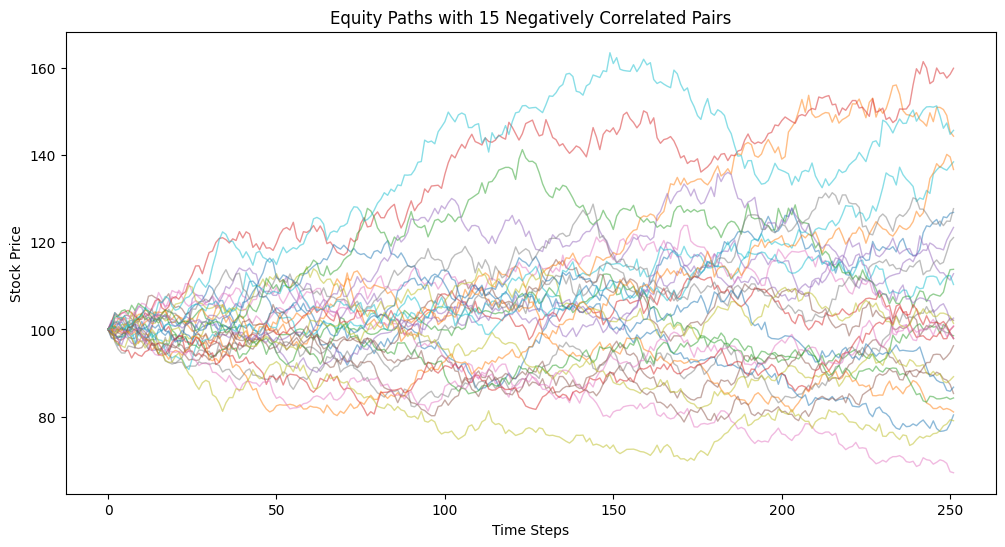

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 252  # Number of trading days (1 year)
N_pairs = 15  # Number of negatively correlated pairs (total assets will be 2 * N_pairs)
N_assets = 2 * N_pairs
dt = 1 / 252  # Time step (daily)
mu = 0.07  # Expected annual return (drift)
sigma = 0.2  # Volatility (20% annualized)
rho = -0.7  # Desired correlation between asset pairs

# Initialize GBM paths
S0 = 100  # Initial stock price
S = np.zeros((N_assets, T))
S[:, 0] = S0

# Generate and simulate GBMs for 15 correlated pairs
for i in range(N_pairs):
    # Generate correlated Brownian motions for each pair
    dW1 = np.random.normal(0, np.sqrt(dt), T)  # First Brownian motion
    dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), T)  # Second Brownian motion (negatively correlated)

    # Simulate GBM for both assets in the pair
    for t in range(1, T):
        S[2 * i, t] = S[2 * i, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW1[t])
        S[2 * i + 1, t] = S[2 * i + 1, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW2[t])

# Plot individual GBM paths
plt.figure(figsize=(12, 6))
for i in range(N_assets):
    plt.plot(S[i], alpha=0.5, lw=1)

plt.title("Equity Paths with 15 Negatively Correlated Pairs")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()


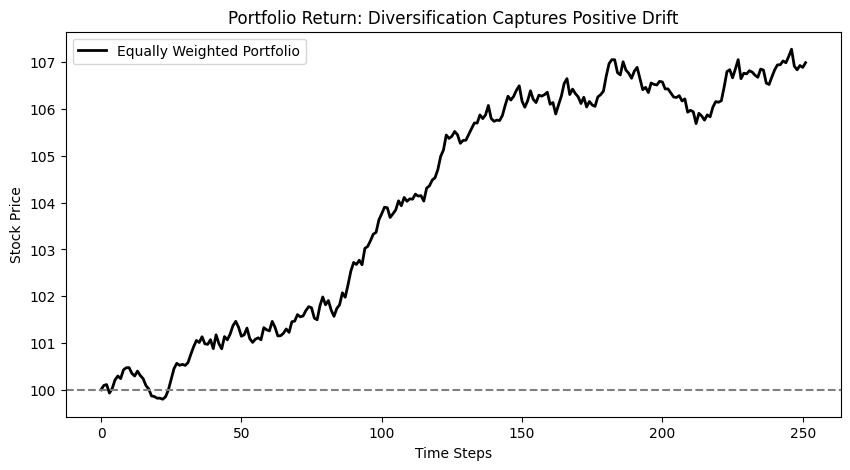

In [84]:
# Compute the equally weighted portfolio by averaging all asset paths
portfolio = np.mean(S, axis=0)

# Plot the portfolio return
plt.figure(figsize=(10, 5))
plt.plot(portfolio, label="Equally Weighted Portfolio", color='black', lw=2)
plt.axhline(y=S0, color='gray', linestyle='--')
plt.title("Portfolio Return: Diversification Captures Positive Drift")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

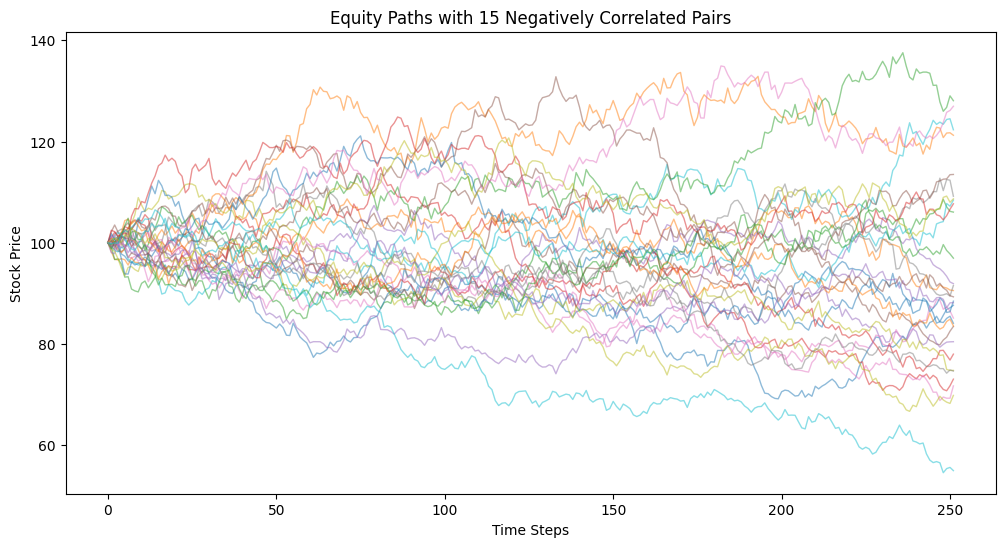

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 252  # Number of trading days (1 year)
N_pairs = 15  # Number of negatively correlated pairs (total assets will be 2 * N_pairs)
N_assets = 2 * N_pairs
dt = 1 / 252  # Time step (daily)
mu = -0.07  # Expected annual return (drift)
sigma = 0.2  # Volatility (20% annualized)
rho = -0.7  # Desired correlation between asset pairs

# Initialize GBM paths
S0 = 100  # Initial stock price
S = np.zeros((N_assets, T))
S[:, 0] = S0

# Generate and simulate GBMs for 15 correlated pairs
for i in range(N_pairs):
    # Generate correlated Brownian motions for each pair
    dW1 = np.random.normal(0, np.sqrt(dt), T)  # First Brownian motion
    dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), T)  # Second Brownian motion (negatively correlated)

    # Simulate GBM for both assets in the pair
    for t in range(1, T):
        S[2 * i, t] = S[2 * i, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW1[t])
        S[2 * i + 1, t] = S[2 * i + 1, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW2[t])

# Plot individual GBM paths
plt.figure(figsize=(12, 6))
for i in range(N_assets):
    plt.plot(S[i], alpha=0.5, lw=1)

plt.title("Equity Paths with 15 Negatively Correlated Pairs")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()

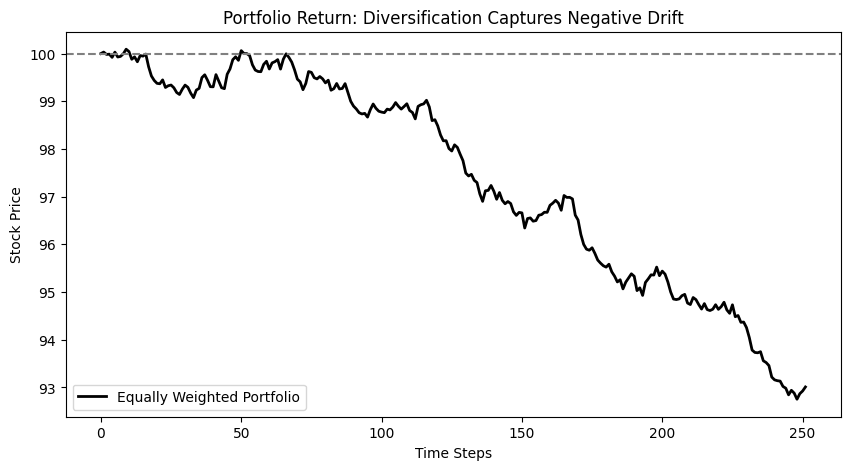

In [93]:
# Compute the equally weighted portfolio by averaging all asset paths
portfolio = np.mean(S, axis=0)

# Plot the portfolio return
plt.figure(figsize=(10, 5))
plt.plot(portfolio, label="Equally Weighted Portfolio", color='black', lw=2)
plt.axhline(y=S0, color='gray', linestyle='--')
plt.title("Portfolio Return: Diversification Captures Negative Drift")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


## The Role of Correlation in Diversification
Diversification is effective when assets are not perfectly correlated. However, **correlations are not static**—they evolve over time, especially during market crises when they tend to increase, reducing the benefits of diversification.

## Data
We will generate synthetic data using correlated Brownian motions:
1. **Case 1:** Assets with a constant correlation.
2. **Case 2:** Assets where correlation changes randomly over time.

This will help us visualize how diversification benefits can vary depending on correlation behavior.

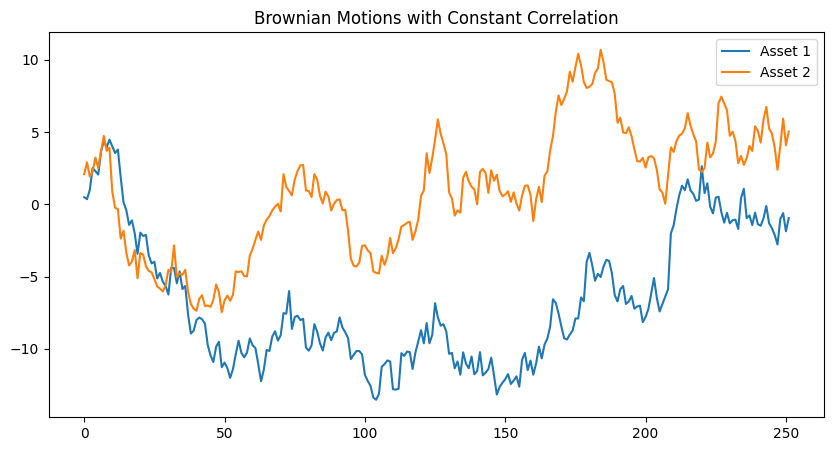

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 252  # Number of trading days
dt = 1   # Time step
mu = 0.05  # Expected return
sigma = 0.2  # Volatility
rho_constant = 0.5  # Constant correlation

# Generate two correlated Brownian motions with constant correlation
dW1 = np.random.normal(0, np.sqrt(dt), T)
dW2 = rho_constant * dW1 + np.sqrt(1 - rho_constant**2) * np.random.normal(0, np.sqrt(dt), T)

S1 = np.cumsum(dW1)  # Asset 1 price movement
S2 = np.cumsum(dW2)  # Asset 2 price movement

# Plot
plt.figure(figsize=(10, 5))
plt.plot(S1, label="Asset 1")
plt.plot(S2, label="Asset 2")
plt.title("Brownian Motions with Constant Correlation")
plt.legend()
plt.show()

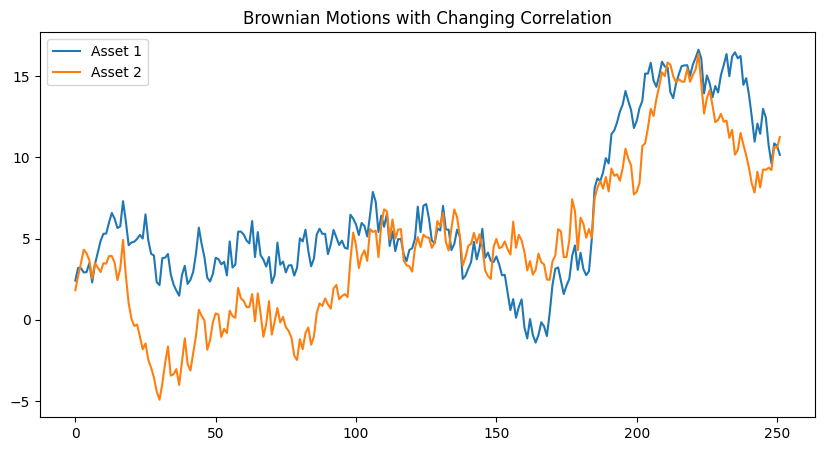

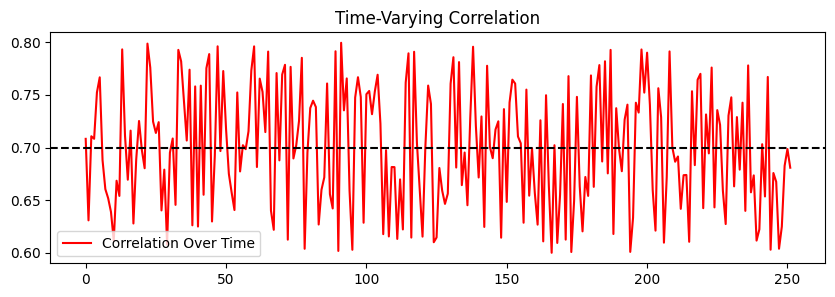

In [4]:
# Generate correlation that changes over time
rho_random = np.random.uniform(0.6, 0.8, T)

dW1 = np.random.normal(0, np.sqrt(dt), T)
dW2 = np.array([rho_random[t] * dW1[t] + np.sqrt(1 - rho_random[t]**2) * np.random.normal(0, np.sqrt(dt)) for t in range(T)])

S1_rand = np.cumsum(dW1)
S2_rand = np.cumsum(dW2)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(S1_rand, label="Asset 1")
plt.plot(S2_rand, label="Asset 2")
plt.title("Brownian Motions with Changing Correlation")
plt.legend()
plt.show()

# Plot correlation over time
plt.figure(figsize=(10, 3))
plt.plot(rho_random, label="Correlation Over Time", color='red')
plt.axhline(y=.7, color='black', linestyle='--')
plt.title("Time-Varying Correlation")
plt.legend()
plt.show()


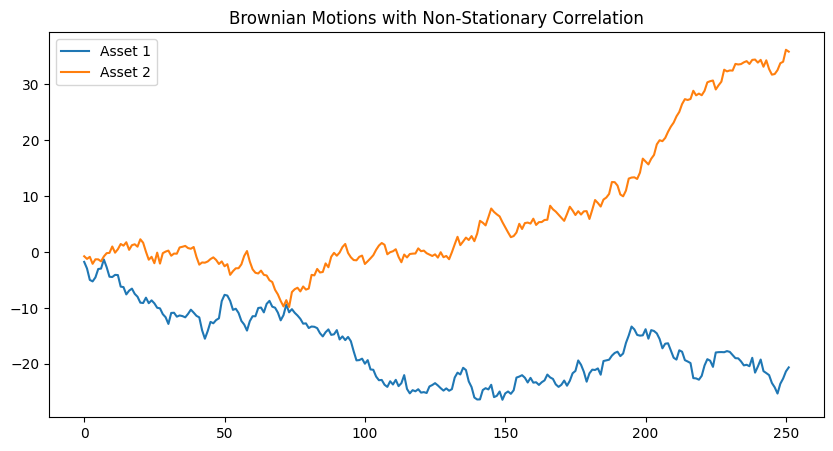

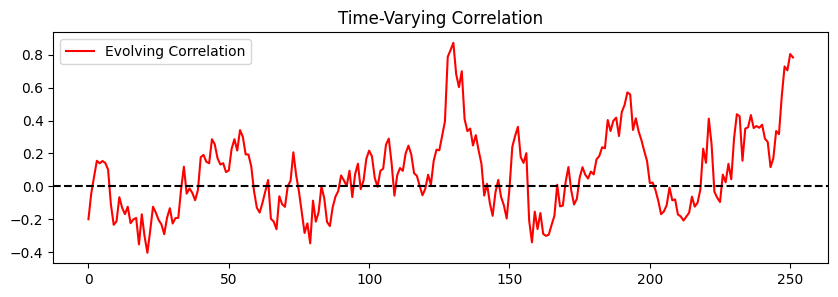

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 252  # Number of trading days
dt = 1   # Time step

# Generate a non-stationary correlation process using an AR(1)-like model
rho = np.zeros(T)
rho[0] = np.random.uniform(-0.8, 0.8)  # Initial correlation
alpha = 0.9  # Persistence factor (closer to 1 means smoother evolution)
shock_std = 0.1  # Standard deviation of random shocks

for t in range(1, T):
    rho[t] = alpha * rho[t-1] + (1 - alpha) * np.random.uniform(-0.8, 0.8) + np.random.normal(0, shock_std)
    rho[t] = np.clip(rho[t], -1, 1)  # Ensure correlation stays within [-1, 1]

# Generate Brownian motions with evolving correlation
dW1 = np.random.normal(0, np.sqrt(dt), T)
dW2 = np.zeros(T)

for t in range(T):
    dW2[t] = rho[t] * dW1[t] + np.sqrt(1 - rho[t]**2) * np.random.normal(0, np.sqrt(dt))

# Compute asset price paths
S1_evolving = np.cumsum(dW1)
S2_evolving = np.cumsum(dW2)

# Plot asset price movements
plt.figure(figsize=(10, 5))
plt.plot(S1_evolving, label="Asset 1")
plt.plot(S2_evolving, label="Asset 2")
plt.title("Brownian Motions with Non-Stationary Correlation")
plt.legend()
plt.show()

# Plot correlation evolution over time
plt.figure(figsize=(10, 3))
plt.plot(rho, label="Evolving Correlation", color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Time-Varying Correlation")
plt.legend()
plt.show()